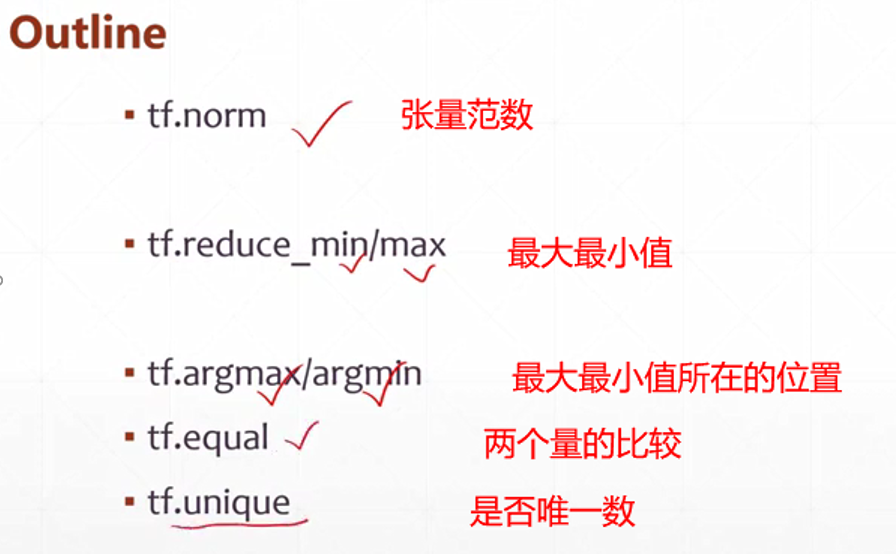

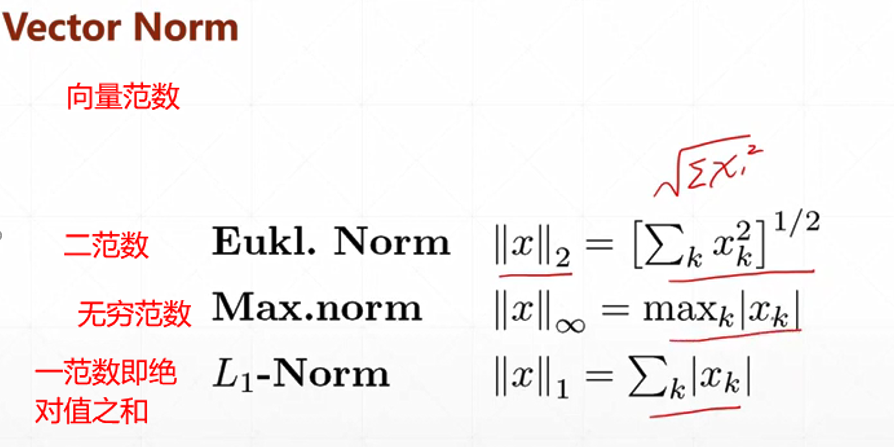

### 这里只讨论向量范数，矩阵范数暂不讨论

In [1]:
import tensorflow as tf

In [4]:
a = tf.ones([2,2])
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

#### 二范数

In [5]:
tf.norm(a)          

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [6]:
tf.sqrt(tf.reduce_sum(tf.square(a)))    #手动计算二范数

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [7]:
a = tf.ones([4,28,28,3])

In [8]:
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=96.99484>

#### 一范数

In [12]:
b = tf.ones([2,3])

In [13]:
tf.norm(b)     #默认为二范数，且是所有维度

<tf.Tensor: shape=(), dtype=float32, numpy=2.4494898>

In [14]:
tf.norm(b,ord=2,axis=1)      #二范数，且设定对第二个维度的所有数据进行计算

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7320508, 1.7320508], dtype=float32)>

In [17]:
#一范数
tf.norm(b,ord=1)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [18]:
tf.norm(b,ord=1,axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

In [19]:
tf.norm(b,ord=1,axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 3.], dtype=float32)>

### 最小最大值平均值

In [20]:
a = tf.random.normal([4,10])

In [21]:
tf.reduce_min(a),tf.reduce_max(a),tf.reduce_mean(a)   #最小最大平均值

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.9354177>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0790215>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.17517987>)

In [22]:
#也可以对给定维度上求解
tf.reduce_min(a,axis=1),tf.reduce_max(a,axis=1),tf.reduce_mean(a,axis=1)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.7216804, -0.4253792, -1.3309267, -1.9354177], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([2.0790215, 1.8928869, 1.7135019, 1.6022197], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.38174063,  0.2906903 ,  0.15230857, -0.12402005], dtype=float32)>)

### 返回最大最小值所在的位置 argmax/argmin

In [29]:
a

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[ 0.3413706 ,  0.44129565, -0.7216804 ,  1.1715196 , -0.06951849,
         2.0790215 ,  0.2050266 ,  1.4752771 , -0.622324  , -0.4825821 ],
       [-0.31447485,  0.80984604, -0.12442759,  0.7915921 , -0.4253792 ,
         0.20505586, -0.03422223, -0.15100531,  1.8928869 ,  0.2570315 ],
       [ 1.7135019 ,  0.65393406,  0.86283267,  0.7459171 ,  0.02415884,
         1.2866706 , -0.5878656 , -0.57624745, -1.3309267 , -1.2688895 ],
       [-1.6991704 ,  0.20651488,  0.14601661,  0.27431503,  0.17455041,
         1.6022197 , -0.22514923,  0.06777301,  0.14814723, -1.9354177 ]],
      dtype=float32)>

In [25]:
tf.argmax(a)     #默认是在axis=0维度上进行求解

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 1, 2, 0, 3, 0, 0, 0, 1, 1], dtype=int64)>

In [26]:
tf.argmax(a).shape

TensorShape([10])

In [27]:
tf.argmin(a).shape

TensorShape([10])

In [28]:
tf.argmax(a,axis=1)      #给定维度上进行求解    

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([5, 8, 0, 5], dtype=int64)>

### 比较操作 tf.equal

In [30]:
a = tf.constant([1,2,3,2,5])

In [31]:
b = tf.range(5)

In [32]:
tf.equal(a,b)

<tf.Tensor: shape=(5,), dtype=bool, numpy=array([False, False, False, False, False])>

In [33]:
res = tf.equal(a,b)
tf.reduce_sum(tf.cast(res,dtype=tf.int32))       #bool=>int，然后再求和，结果即相等的个数

<tf.Tensor: shape=(), dtype=int32, numpy=0>

### 一个小例子

In [43]:
a = tf.abs(tf.random.normal([2,3]))
b = a/tf.reduce_max(a)        #假设b为对每种预测结果的概率大小
b

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.5024314 , 1.        , 0.7012653 ],
       [0.40225807, 0.01811995, 0.14325732]], dtype=float32)>

In [49]:
pred = tf.cast(tf.argmax(b,axis=1),dtype=tf.int32)      #得到对于每个维度，最终的预测结果
pred

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

In [50]:
y = tf.constant([1,2],dtype=tf.int32)      #y作为真实的结果
y

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>

In [54]:
correct = tf.reduce_sum(tf.cast(tf.equal(y,pred),tf.int32))       #代表预测成功的个数
correct

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [55]:
correct/len(y)        #预测成功率

<tf.Tensor: shape=(), dtype=float64, numpy=0.5>

### unique  返回唯一数

In [56]:
a = tf.range(5)

In [57]:
tf.unique(a)      #返回唯一的数据，并返回数据所在唯一表的位置

Unique(y=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>, idx=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>)

In [63]:
a = tf.constant([4,2,2,4,3])
tf.unique(a)

Unique(y=<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 2, 3])>, idx=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 1, 0, 2])>)

In [64]:
#根据unique恢复出原来的tensor
tf.gather(tf.unique(a).y, tf.unique(a).idx)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 2, 2, 4, 3])>